# Twitch Gaming Data 
***

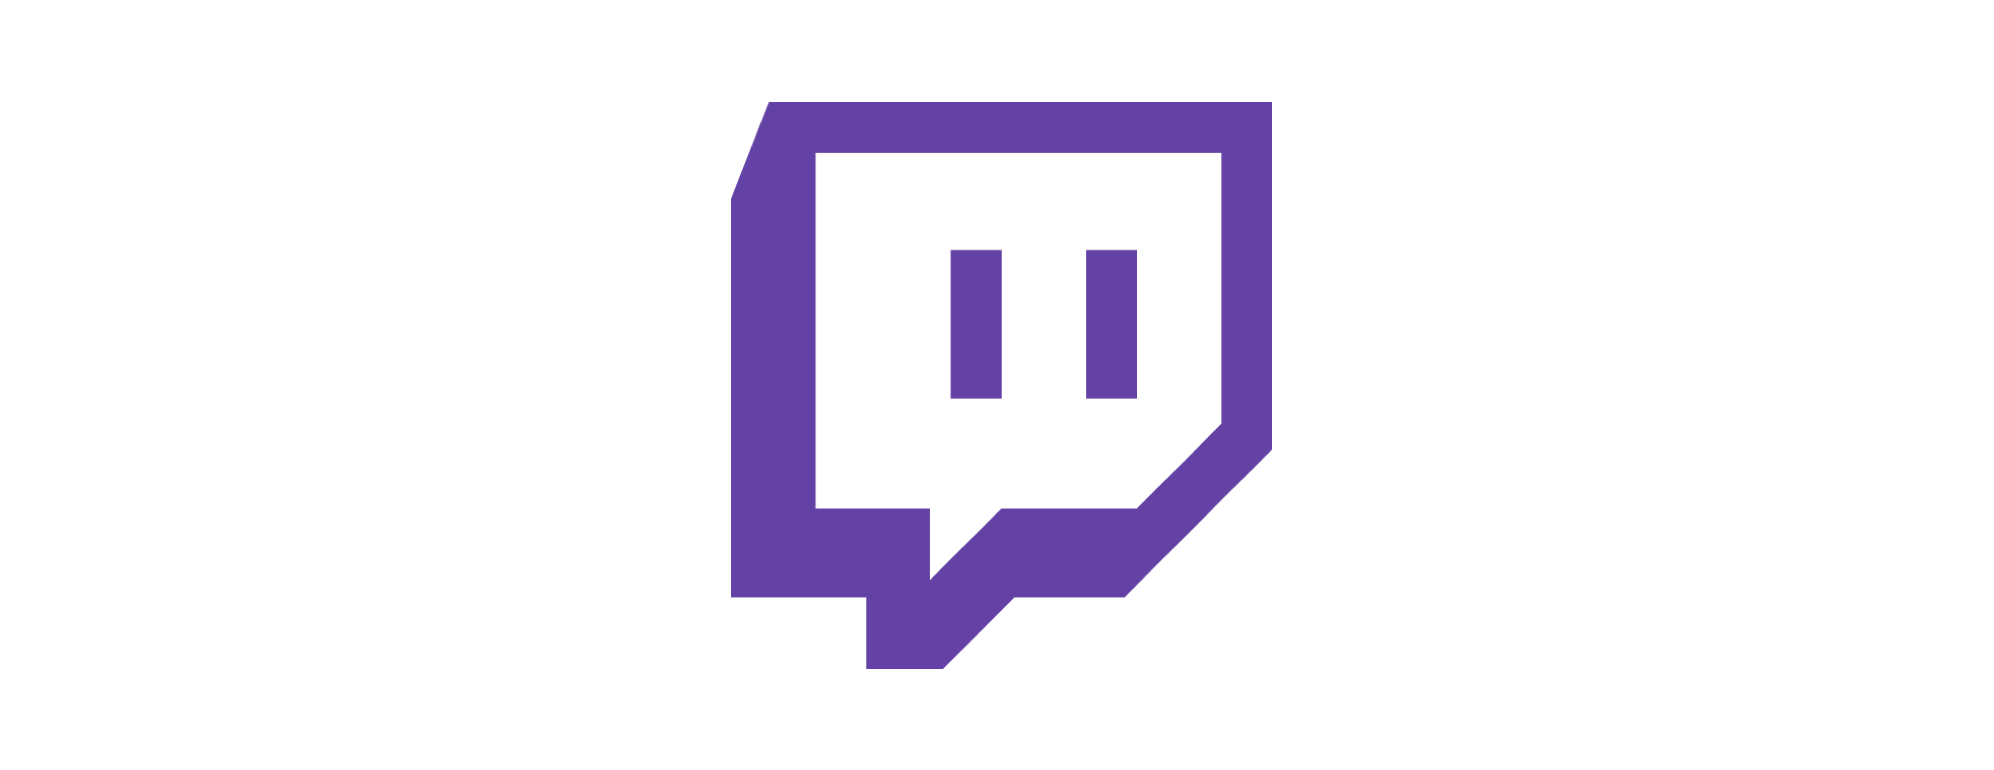

In this project, Twitch data will be visualized using `Python` and `Matplotlib`, in the forms of:
- **Bar Graph**: Featured Games
- **Pie Chart**: Stream Viewers’ Locations
- **Line Graph**: Time Series Analysis

The data used will be the processed data from the result of utilizing SQL queries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## **Bar Graph**: Featured Games

Steps:

1. Load the processed data into a `pandas` dataframe
2. Set variables to individual columns
3. Limit the number of games to display
    - Games limited to 15 games
    - The remaining games in the dataset have too little viewers to display on the graph
4. Plot bar graph with relevant information

In [54]:
games = pd.read_csv('./data/processed/popular_games.csv')
games.head()

,game,num_views
0,League of Legends,193533
1,Dota 2,85608
2,Counter-Strike: Global Offensive,54438
3,DayZ,38004
4,Heroes of the Storm,35310


In [55]:
games_list = games.game
viewers = games.num_views

<div class="alert alert-block alert-warning">
<b>Insight:</b>
Notice how the pie chart is too messy and has too many extra slices

Data needs to be cleaned and processed further for the pie chart to be displayed more meaningfully
</div>

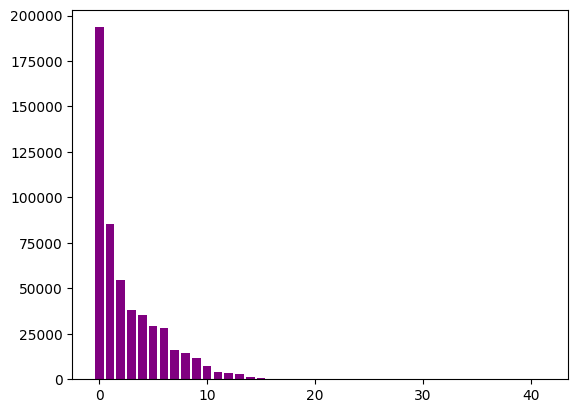

In [56]:
plt.bar(range(len(games_list)), viewers, color='purple')
plt.show()

In [57]:
games_list = games_list[:16]
viewers = viewers[:16]

<div class="alert alert-block alert-success">
<b>Success:</b>
Plot is successful with relevant data showing

Plot is cleaned up
</div>

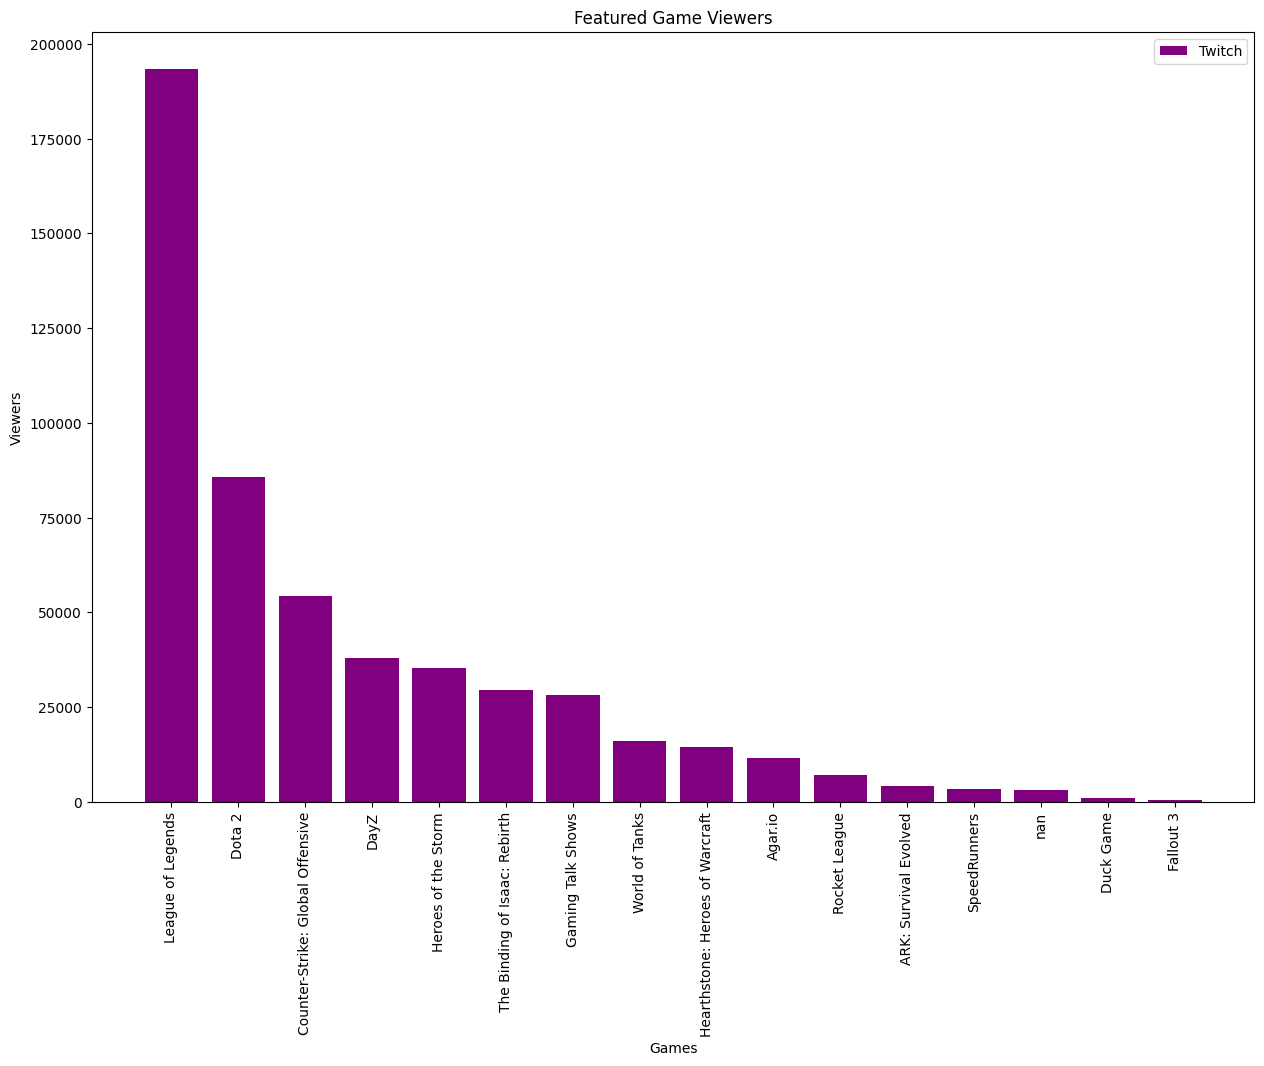

In [58]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(range(len(games_list)), viewers, color='purple')
plt.title('Featured Game Viewers')
plt.xlabel('Games')
plt.ylabel('Viewers')
plt.legend(['Twitch'])
ax.set_xticks(range(len(games_list.values)))
ax.set_xticklabels(games_list.values, rotation=90)
plt.show()

## **Pie Chart**: League of Legends Viewers' Whereabouts

Steps:

1. Load the processed data into a `pandas` dataframe
2. Set variables to individual columns
3. Plot the data using the variables as arguments into a `pie chart`
4. Limit the number of countries to display to clean up visualization
    - Countries limited to 12 countries
    - 11 countries showing with the remaining countries combined into one cateogry
4. Plot a new pie chart with the cleaned data

In [117]:
league = pd.read_csv('./data/processed/LoL_viewer_countries.csv')
league.head()

,country,num_people
0,US,85606
1,CA,13034
2,DE,10835
3,NaN,7641
4,GB,6964


In [118]:
country_labels = league.country
country_counts = league.num_people

<div class="alert alert-block alert-warning">
<b>Insight:</b>
Notice how the pie chart is too messy and has too many extra slices

Data needs to be cleaned and processed further for the pie chart to be displayed more meaningfully
</div>

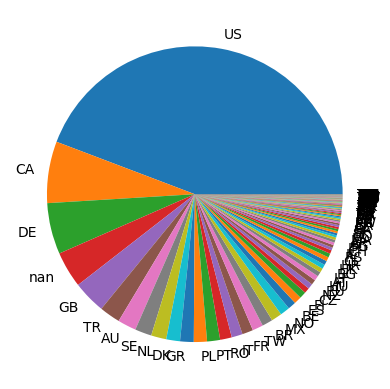

In [119]:
plt.pie(country_counts, labels=country_labels)
plt.show()

In [120]:
league[:11]

,country,num_people
0,US,85606
1,CA,13034
2,DE,10835
3,NaN,7641
4,GB,6964
5,TR,4412
6,AU,3911
7,SE,3533
8,NL,3213
9,DK,2909


In [111]:
sum(league.num_people)

193533

In [121]:
country_labels = league.country[:11].values
country_counts = league.num_people[:11].values

In [122]:
country_labels = np.append(country_labels,'Other')
print(country_labels)

country_counts = np.append(country_counts, sum(league.num_people[11:].values))
print(country_counts)

print(sum(country_counts))

['US' 'CA' 'DE' nan 'GB' 'TR' 'AU' 'SE' 'NL' 'DK' 'GR' 'Other']
[85606 13034 10835  7641  6964  4412  3911  3533  3213  2909  2885 48590]
193533


<div class="alert alert-block alert-success">
<b>Success:</b>
Plot is successful with relevant data showing

Plot is cleaned up
</div>

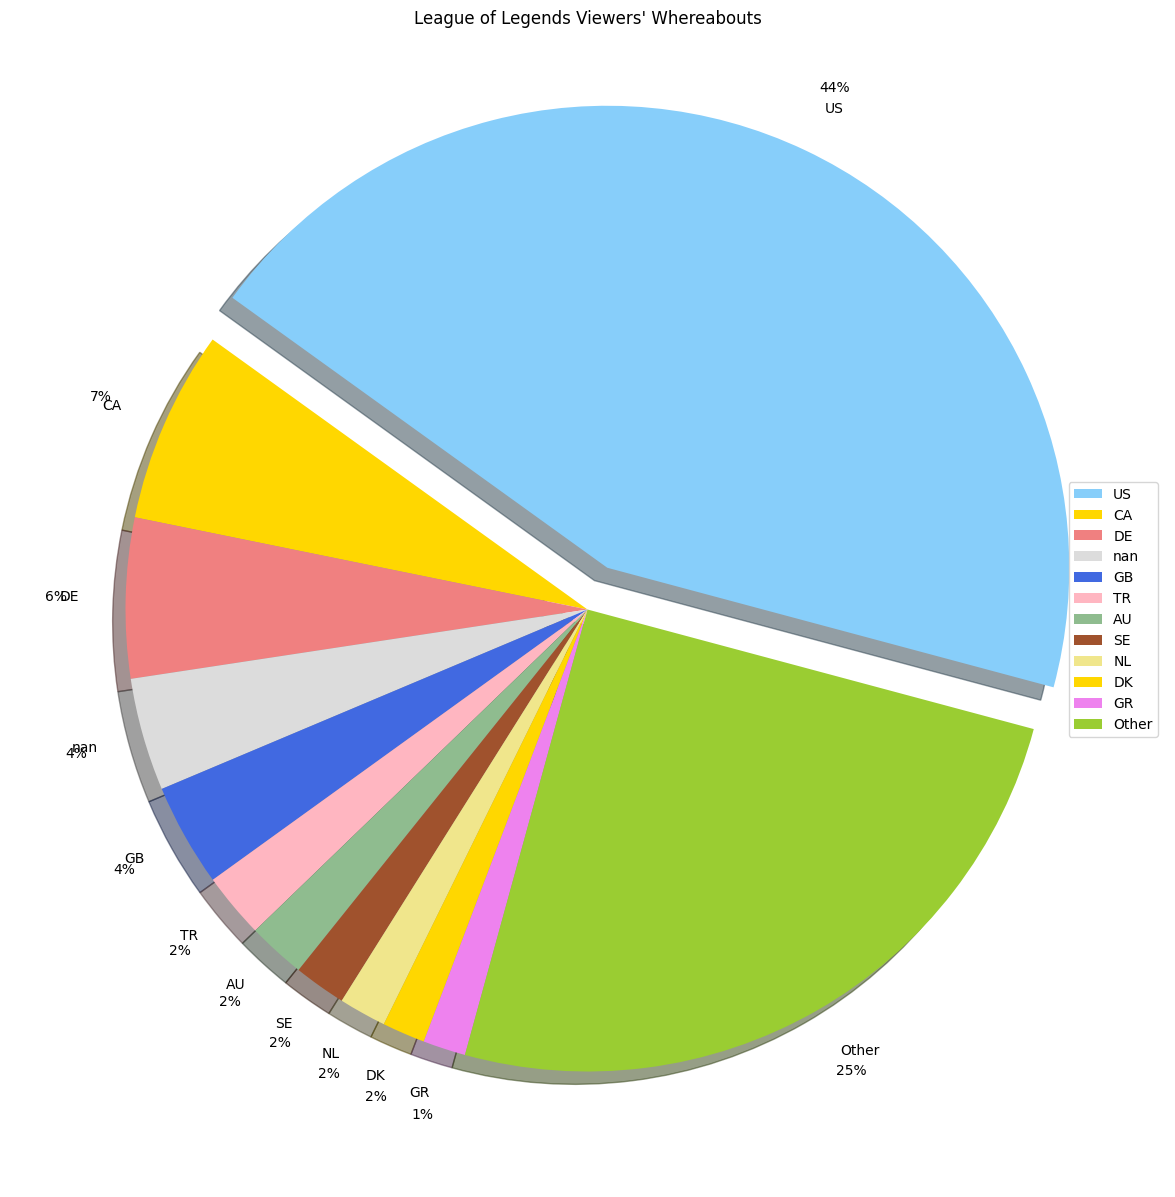

In [132]:
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig, ax = plt.subplots(figsize=(20,15))
plt.pie(country_counts, labels=country_labels, explode=explode, colors=colors, shadow=True, startangle=345,
        autopct='%1.0f%%', pctdistance=1.15)
plt.title("League of Legends Viewers' Whereabouts")
plt.legend(country_labels, loc="right")
plt.show()

## **Line Graph**: Time Series Analysis

Steps:

1. Load the processed data into a `pandas` dataframe
2. Set variables to individual columns
3. Set the upper and lower bound for `view_count` using a 15% error
4. Plot the time series graph

In [133]:
data = pd.read_csv('./data/processed/view_count_hour_US.csv')
data.head()

,time,view_count
0,0,7025
1,1,4693
2,2,5961
3,3,4236
4,4,3567


In [134]:
hour = data.time.values
view_per_hour = data.view_count.values

print(hour)
print(view_per_hour)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 7025  4693  5961  4236  3567  1597   236   338   935  1214  1940  7349
 11766  9740  7521  9065 10134 11929 12215 15206 19656 18425 13984 11646]


In [138]:
y_upper = view_per_hour * 1.15
y_lower = view_per_hour * 0.85

print(y_upper)
print(y_lower)

[ 8078.75  5396.95  6855.15  4871.4   4102.05  1836.55   271.4    388.7
  1075.25  1396.1   2231.    8451.35 13530.9  11201.    8649.15 10424.75
 11654.1  13718.35 14047.25 17486.9  22604.4  21188.75 16081.6  13392.9 ]
[ 5971.25  3989.05  5066.85  3600.6   3031.95  1357.45   200.6    287.3
   794.75  1031.9   1649.    6246.65 10001.1   8279.    6392.85  7705.25
  8613.9  10139.65 10382.75 12925.1  16707.6  15661.25 11886.4   9899.1 ]


<div class="alert alert-block alert-success">
<b>Success:</b>
Plot is successful with relevant data showing
</div>

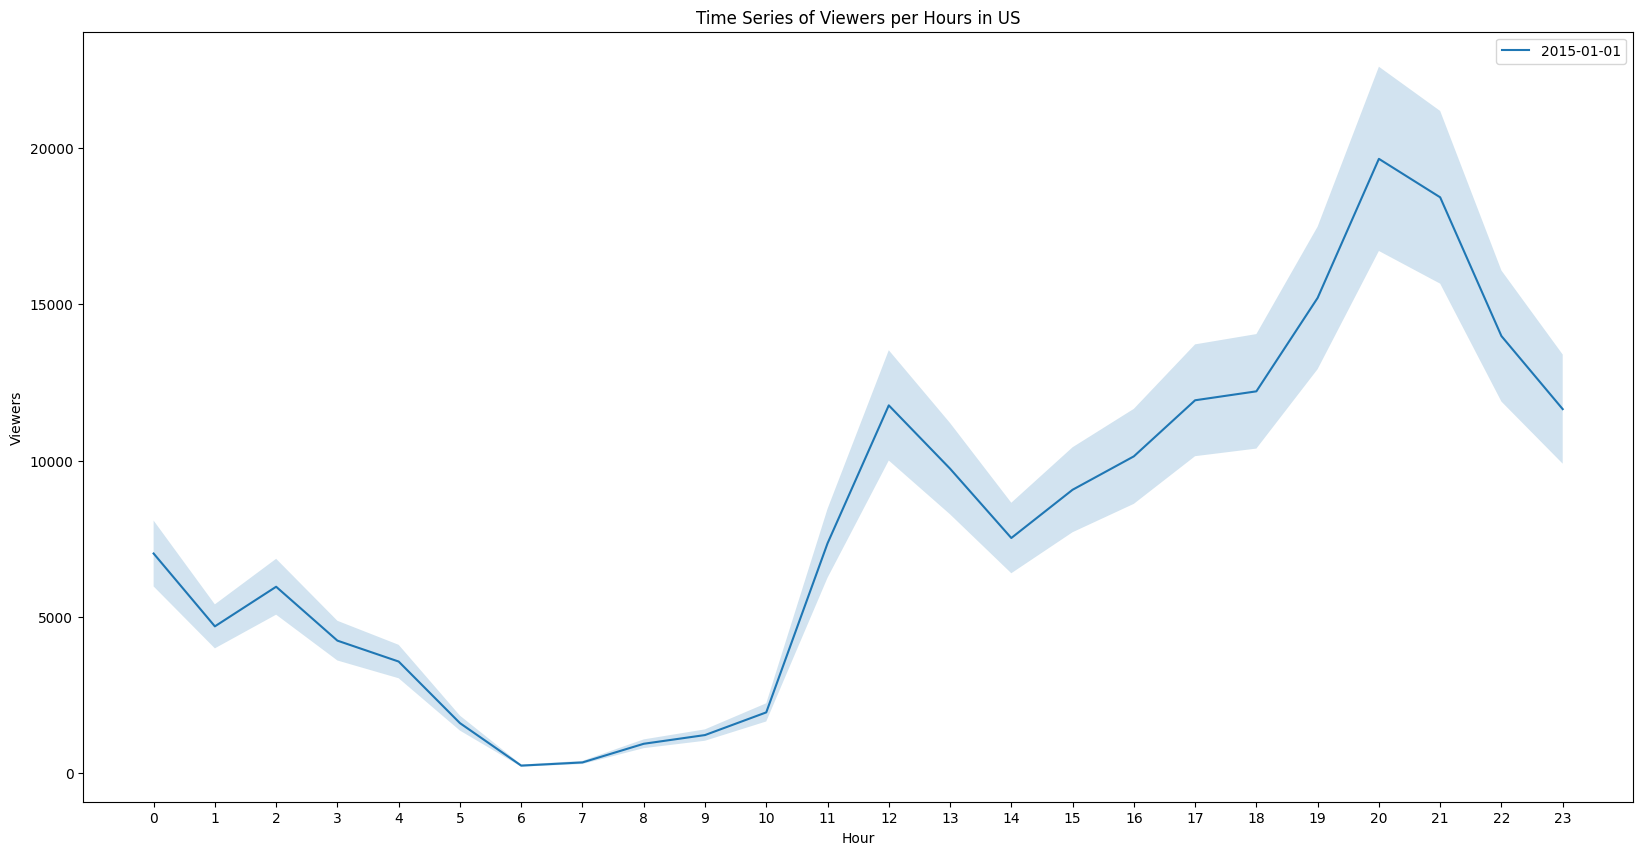

In [145]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(hour, view_per_hour)
plt.fill_between(hour, y_upper, y_lower, alpha=0.2)
ax.set_xticks(hour)
plt.title('Time Series of Viewers per Hours in US')
plt.xlabel('Hour')
plt.ylabel('Viewers')
plt.legend(['2015-01-01'])
plt.show()